In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("daiktai.csv", sep="ʃ", on_bad_lines='skip')

C:\Users\arnas\AppData\Local\Temp\ipykernel_10320\236887269.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("daiktai.csv", sep="ʃ", on_bad_lines='skip')


In [14]:
data.head()

,item_id,item_title,item_user_id,item_is_hidden,item_is_reserved,item_reserved_for_user_id,item_is_visible,item_is_unisex,item_is_closed,item_active_bid_count,...,Sub_Category_6,Sub_Category_7,item_created_at,item_color1,item_color2,item_video_game_rating,item_status,item_view_count,item_performance,description_token_kiekis
0,4279061921,Šilko užvalkalai pagalvei,41350440,0,0,NaN,1,0.0,0,0,...,NaN,NaN,03-27 09:57,Tamsiai žalia,Chaki,NaN,Nauja su etiketėmis,12,NaN,10
1,4267594310,Avalynė,41350440,0,0,NaN,1,0.0,0,2,...,NaN,NaN,03-24 17:44,Marga,NaN,NaN,Gera,48,NaN,10
2,4230411606,Gėlių stovai,41350440,0,0,NaN,1,0.0,0,0,...,NaN,NaN,03-16 16:30,Juoda,Aukso,NaN,Labai gera,44,NaN,28
3,4228600667,Kreminė bliuskyte,41350440,0,0,NaN,1,0.0,0,0,...,NaN,NaN,03-16 11:15,Kreminė,Smėlio,NaN,Nauja su etiketėmis,52,NaN,1
4,4205504709,Tommy Hilfiger šlepetės,41350440,0,0,NaN,1,0.0,0,7,...,NaN,NaN,03-10 16:14,Ruda,Aukso,NaN,Nauja su etiketėmis,38,NaN,1


In [5]:
print(data['Sub_Category_1'].value_counts()) 

Sub_Category_1
Moterims         1456789
Vaikams           987717
Vyrams            171332
Pramogos          110354
Namams             31579
Kids               10898
Women               6698
Gyvūnams            4124
Men                  406
Entertainment        297
Home                  65
Pet care              37
Name: count, dtype: int64


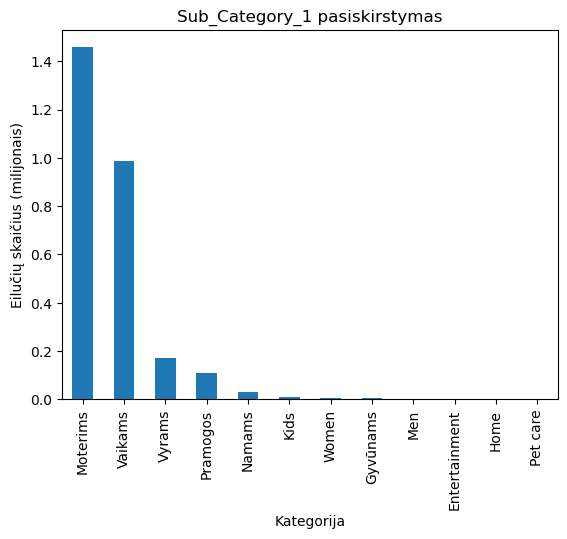

In [48]:
import matplotlib.ticker as mticker

counts = data['Sub_Category_1'].value_counts()

counts.plot(kind='bar')

plt.title('Sub_Category_1 pasiskirstymas')
plt.xlabel('Kategorija')
plt.ylabel('Eilučių skaičius (milijonais)')
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}'))
plt.show()

In [6]:
print(data['Sub_Category_2'].value_counts())

Sub_Category_2
Drabužiai                      1243509
Apranga mergaitėms              517908
Apranga berniukams              348658
Avalynė                         160969
Aksesuarai                      155510
Knygos                           77418
Žaislai                          66544
Rankinės                         49462
Kūdikių ir vaikų priežiūra       23088
Kosmetika                        18671
Žaidimai ir galvosūkiai          16461
Visa kita                        12869
Interjero akcentai               11470
Muzika ir vaizdo turinys         10698
Stalo serviravimas                9761
Tekstilė                          6497
Vaizdo žaidimai ir konsolės       5777
Clothing                          5678
Boys clothing                     5268
Girls clothing                    5184
Mokyklos reikmenys                4992
Baldai vaikams                    4382
Vežimukai                         4362
Šventės                           3851
Judėjimo priemonės                2836
Šunys     

In [7]:
print(data['Sub_Category_1'].nunique())

12


In [8]:
print(data['Sub_Category_2'].nunique())

56


In [49]:
data['item_description'] = data['item_title'].astype(str) + " " + data['item_description'].astype(str)

print(data['item_description'].head(5))

0    Šilko užvalkalai pagalvei Nauji, šilko užvalka...
1    Avalynė 41 dydis   Avalynė dėvėta, išvalius, n...
2    Gėlių stovai Gražūs, juodi su aukso spalvos ko...
3                              Kreminė bliuskyte Nauja
4                       Tommy Hilfiger šlepetės Naujos
Name: item_description, dtype: object


In [10]:
print(data['item_country'].value_counts())

item_country
Lietuva          908830
Deutschland      648172
Litwa            244610
France           139144
Vokietija        122657
                  ...  
Njemačka             10
Hollandia             7
Țările de Jos         7
Holandia              3
Taliansko             2
Name: count, Length: 133, dtype: int64


In [50]:
import nltk

def token_count(text):
    tokens = nltk.word_tokenize(str(text)) 
    return len(tokens)

data['description_token_kiekis'] = data['item_description'].apply(token_count)

print(data[['item_description', 'description_token_kiekis']].head(2))

                                    item_description  description_token_kiekis
0  Šilko užvalkalai pagalvei Nauji, šilko užvalka...                        13
1  Avalynė 41 dydis   Avalynė dėvėta, išvalius, n...                        11


In [51]:
print(data['item_description'].isna().sum())

0


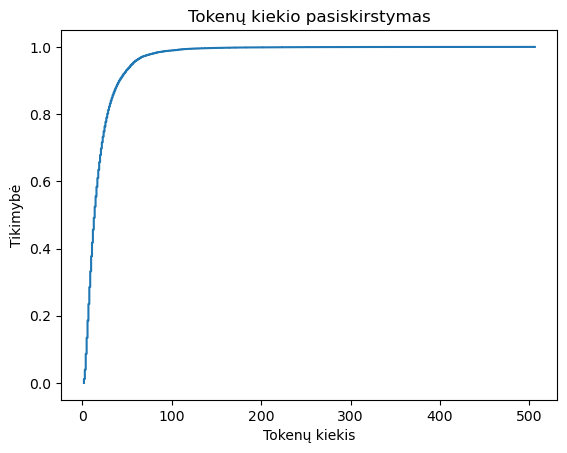

In [52]:
import matplotlib.pyplot as plt
import numpy as np

sorted_data = np.sort(data['description_token_kiekis'])
cdf = np.arange(len(sorted_data)) / len(sorted_data)
plt.plot(sorted_data, cdf)
plt.title('Tokenų kiekio pasiskirstymas')
plt.xlabel('Tokenų kiekis')
plt.ylabel('Tikimybė')
plt.show()

In [53]:
import re

def token_count_beskyr(text):
    text = re.sub(r'[^\w\s]', '', str(text))
    tokens = nltk.word_tokenize(text)
    return len(tokens)

data['description_token_kiekis_beskyr'] = data['item_description'].apply(token_count_beskyr)

print(data[['item_description', 'description_token_kiekis_beskyr']].head(2))

                                    item_description  \
0  Šilko užvalkalai pagalvei Nauji, šilko užvalka...   
1  Avalynė 41 dydis   Avalynė dėvėta, išvalius, n...   

   description_token_kiekis_beskyr  
0                               12  
1                                9  


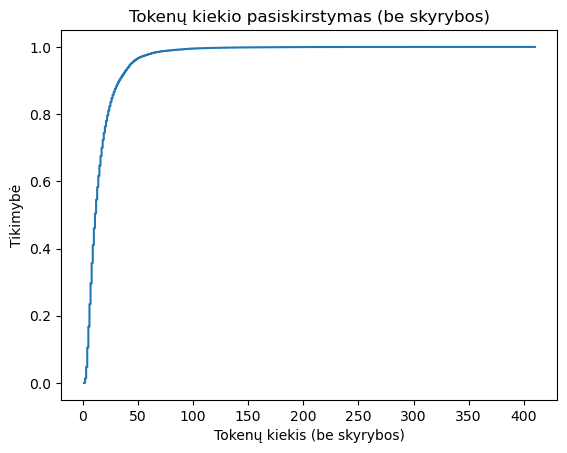

In [54]:
sorted_data = np.sort(data['description_token_kiekis_beskyr'])
cdf = np.arange(len(sorted_data)) / len(sorted_data)
plt.plot(sorted_data, cdf)
plt.title('Tokenų kiekio pasiskirstymas (be skyrybos)')
plt.xlabel('Tokenų kiekis (be skyrybos)')
plt.ylabel('Tikimybė')
plt.show()

In [55]:
import numpy as np

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

counts, bin_edges = np.histogram(data['description_token_kiekis'], bins=bins)

for i in range(len(counts)):
    print(f"Intervalas {bin_edges[i]} - {bin_edges[i+1]}: {counts[i]} reikšmių")

Intervalas 0 - 50: 2585148 reikšmių
Intervalas 50 - 100: 165244 reikšmių
Intervalas 100 - 150: 21374 reikšmių
Intervalas 150 - 200: 4857 reikšmių
Intervalas 200 - 250: 1983 reikšmių
Intervalas 250 - 300: 826 reikšmių
Intervalas 300 - 350: 401 reikšmių
Intervalas 350 - 400: 133 reikšmių
Intervalas 400 - 450: 199 reikšmių
Intervalas 450 - 500: 129 reikšmių


In [56]:
import numpy as np

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

counts, bin_edges = np.histogram(data['description_token_kiekis_beskyr'], bins=bins)

for i in range(len(counts)):
    print(f"Intervalas {bin_edges[i]} - {bin_edges[i+1]}: {counts[i]} reikšmių")

Intervalas 0 - 50: 2682421 reikšmių
Intervalas 50 - 100: 83985 reikšmių
Intervalas 100 - 150: 9969 reikšmių
Intervalas 150 - 200: 2618 reikšmių
Intervalas 200 - 250: 1025 reikšmių
Intervalas 250 - 300: 245 reikšmių
Intervalas 300 - 350: 32 reikšmių
Intervalas 350 - 400: 0 reikšmių
Intervalas 400 - 450: 1 reikšmių
Intervalas 450 - 500: 0 reikšmių
